In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip


In [4]:
# os모듈. 파이썬 기본내장 라이브러리.
# Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게 해줍
# os.walk() 모든 디렉토리/파일 출력

In [5]:
train = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip")

In [6]:
# train

In [7]:
test = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip")

In [8]:
# test

In [9]:
display(train,test)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
# '파이썬 dtpye 종류' 검색.
# https://rfriend.tistory.com/285#:~:text=%EB%8D%B0%EC%9D%B4%ED%84%B0%20%ED%98%95%ED%83%9C(Data%20Type%2C%20dtype,%EB%B6%80%ED%98%B8%20%EC%97%86%EB%8A%94%20%EC%A0%95%EC%88%98%ED%98%95%20(unsigned%20integers%20%2C
# 'pandas dtype string vs object' 검색
# https://pbpython.com/pandas_dtypes.html

In [12]:
# train.drop(["Date","Weekly_Sales"]) #에러남. axis가 0이면 데이터프레임의 칼럼명을 없애서 이걸 칼럼명 인덱싱을 못함.

In [13]:
train2 = train.drop(["Date","Weekly_Sales"],1) #axis, default는 0
test2 = test.drop("Date",1)

In [14]:
train3 = train.drop(["Weekly_Sales"],1) # ValueError: could not convert string to float: '2010-02-05'

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=4) # 탭 활용

In [16]:
%%time
rf.fit(train2,train["Weekly_Sales"]) # 탭 활용

CPU times: user 42.1 s, sys: 210 ms, total: 42.3 s
Wall time: 11.3 s


RandomForestRegressor(n_jobs=4)

In [17]:
result = rf.predict(test2)

In [18]:
# 제출 파일 만들기
sub = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip")
# sub

In [19]:
sub["Weekly_Sales"] = result
# sub

In [20]:
sub.to_csv("submission1.csv",index=0) #default=True : Write row names (index).

In [21]:
# public 점수 vs private 점수
# Public Leaderboard - test data의 일부로 매겨지는 랭킹.
# Private Leaderboard - 최종 랭킹은 Public Leaderboard에 사용되지 않은 test data를 기반으로 매겨짐.
# The test set given to us is actually pre-divided into PartA and PartB. In our submissions,
# Kaggle can determine PartA from PartB and use PartA to generate the accuracy of our model(displayed on the public LB), 
# PartB to test the overfitting problems(displayed on the private LB).

In [22]:
train = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip")
test = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip")

all_data = pd.concat([train,test])

In [23]:
all_data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
115059,45,98,2013-06-28,NaN,False
115060,45,98,2013-07-05,NaN,False
115061,45,98,2013-07-12,NaN,False
115062,45,98,2013-07-19,NaN,False


In [24]:
all_data["Date"] = all_data["Date"].astype("datetime64")

In [25]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 115063
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         536634 non-null  int64         
 1   Dept          536634 non-null  int64         
 2   Date          536634 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     536634 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 21.0 MB


In [26]:
all_data["year"] = all_data["Date"].dt.year
all_data["month"] = all_data["Date"].dt.month
all_data["week"] = all_data["Date"].dt.week
# day, weekday, hour,minute,second

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


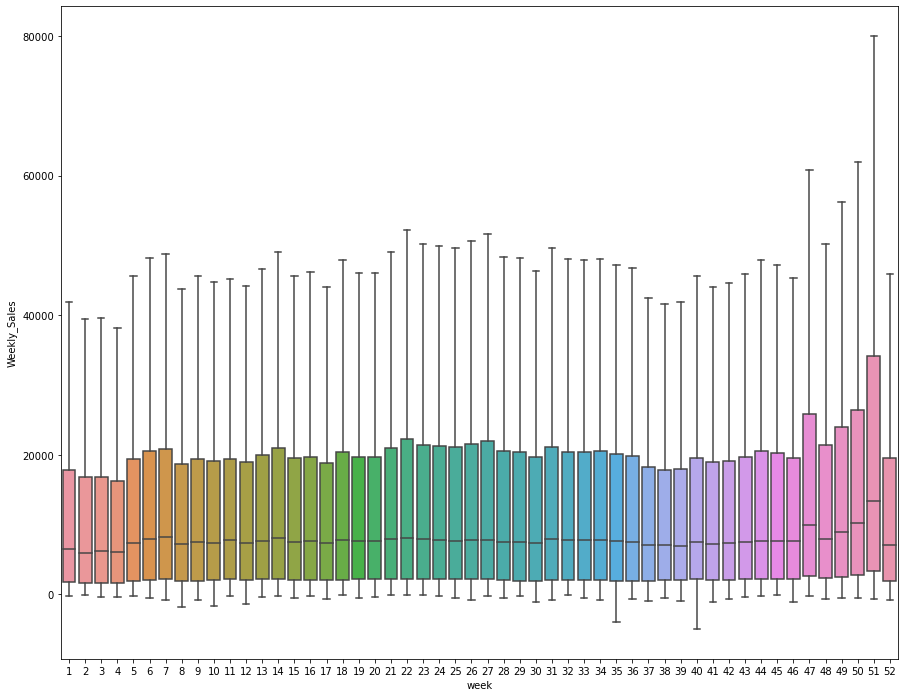

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,12)) #figsize 가로세로 길이
sns.boxplot(all_data["week"],all_data["Weekly_Sales"],showfliers=False)


In [28]:
# all_data

In [29]:
all_data2 = all_data.drop(["Date","Weekly_Sales"],1)

In [30]:
train2 = all_data2[:len(train)]
test2 = all_data2[len(train):]

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=4)

In [32]:
%%time
rf.fit(train2,train["Weekly_Sales"])

CPU times: user 2min 52s, sys: 3.36 s, total: 2min 55s
Wall time: 46 s


RandomForestRegressor(n_jobs=4)

In [33]:
result = rf.predict(test2)

In [34]:
# 제출 파일 만들기
sub = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip")
sub["Weekly_Sales"] = result
sub.to_csv("submission2.csv",index=0) 

In [35]:
sub

,Id,Weekly_Sales
0,1_1_2012-11-02,33855.9415
1,1_1_2012-11-09,18917.1512
2,1_1_2012-11-16,19152.0852
3,1_1_2012-11-23,20191.1082
4,1_1_2012-11-30,22630.5954
...,...,...
115059,45_98_2013-06-28,689.8845
115060,45_98_2013-07-05,679.5177
115061,45_98_2013-07-12,698.0683
115062,45_98_2013-07-19,776.5807


In [36]:
1+2

3

In [37]:
print("pypypython")

pypypython
